Cross-Borehole example
======================
In this example we are going to invert one of the example given in the R2 manual. The aim is to detect a hidden block
in the bottom left of the picture as shown below:
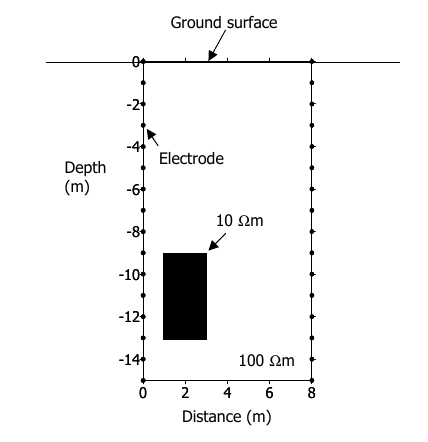

First let's import pyR2 stuff:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np # just for parsing the electrode position file
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

from api.R2 import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/api
pyR2 version =  1.0


Then we will import the `protocol.dat` file that was outputed by the forward model with this geometry and invert it. Note what we also need to import the electrodes position from a .csv file with 3 columns:x, y, buried. The `buried` column contains 1 if the electrode is buried and 0 if not.

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
407/407 reciprocal measurements NOT found.
0 measurements error > 20 %
computed DOI : -20.33
elec_type ['buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'electrode', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'buried', 'electrode']
Generating gmsh input file...

doi in gmshWrap.py: -20.333333
adding surface points and electrodes to input file...
probing for boundaries and other additions to the mesh
buried electrodes added to input file
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/pyr2/src/api/exe

Info    : Running 'Z:\media\jkl\data\phd\tmp\pyr2\src\api\exe\gmsh.exe temp.geo -2' [Gmsh 3.0.6, 1 node, max. 1 thread

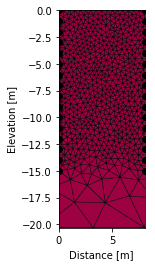

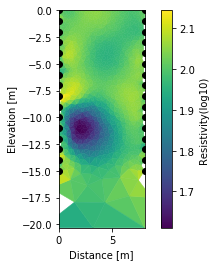

In [2]:
k = R2()
k.createSurvey('../src/api/test/protocolXbh.dat', ftype='Protocol') # importing data
x = np.genfromtxt('../src/api/test/elecXbh.csv', delimiter=',') # importing electrode position
k.elec[:,[0,2]] = x[:,:2] # assigning the x and z to the R2 object
buried = x[:,2].astype(bool) # convert the 0/1 array to a boolean array with True when electrode is burried
k.createMesh('trian', buried=buried, cl=0.5, cl_factor=10)
# cl is characteristic length, it defines the resolution of the mesh around the electrodes, the smaller, the finer
# cl_factor is how the mesh will grow away from the electrode
# NOTE that a too fine mesh (very small cl) will takes a lot of RAM
# but a too coarse mesh won't be able to resolve the target
k.showMesh() # display the mesh
k.invert(iplot=False)
k.showResults(sens=False) # we disable the sensitivity to better see the target